### Домашнее задание №6

**Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.**

Реализуем средствами Python алгоритм градиентного бустинга для деревьев решений.

In [1]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

Используем один из "игрушечных" датасетов из той же библиотеки.

In [2]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

Разделим выборку на обучающую и тестовую в соотношении 75/25.

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

Напишем функцию, реализующую предсказание в градиентном бустинге.

In [4]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
#     predictions = np.zeros(X.shape[0])
#     for i, x in enumerate(X):
#         prediction = 0
#         for alg in trees_list:
#             prediction += eta * alg.predict([x])[0]
#         predictions[i] = prediction
        
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

В качестве функционала ошибки будем использовать среднеквадратичную ошибку. Реализуем соответствующую функцию.

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

Используем $L_{2}$ loss $L(y, z) = (y - z)^{2},$ ее производная по $z$ примет вид $L'(y, z) = 2(z - y)$. Реализуем ее также в виде функции (коэффициент 2 можно отбросить).

In [6]:
def residual(y, z):
    return - (z - y)

Реализуем функцию обучения градиентного бустинга.

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

Теперь обучим несколько моделей с разными параметрами и исследуем их поведение.

In [8]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

**Построим графики зависимости ошибки на обучающей и тестовой выборках в зависимости от числа деревьев (итераций). Поскольку каждое новое добавленное дерево - это еще одна итерация.**

In [9]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.grid()
    plt.legend(loc='upper right')
    plt.show()

***Увеличим количество деревьев до пятидесяти (n_trtees = 50) и  одновременно уменьшим cкорость обучения (eta = 0.1). Такие параметры модели позволяют ей более плавно обучаться и полученных данных достаточно для построения информативных графиков.***

***Далее обучим и протестируем три модели, при этом будем изменять параметр max_depth. Первая модель с глубиной 3, сторая с глубиной 5 и третья - 7.***

***Далее обучим и протестируем три модели, при этом будем изменять параметр max_depth. Первая модель с глубиной 3, вторая с глубиной 5 и третья - 7. Полученные данные сохраним в отдельные переменные для построения графиков.***

In [10]:
%%time
n_trees = 50

max_depth = 3

eta = 0.1

trees, train_errors_3, test_errors_3 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

CPU times: user 46.4 s, sys: 991 ms, total: 47.4 s
Wall time: 46.7 s


In [11]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1350.7341959362136
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3029.3335754017435


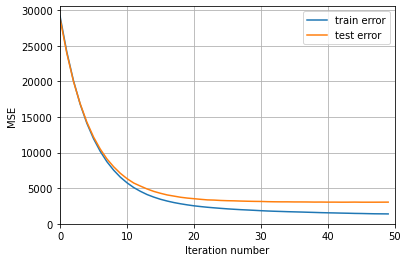

In [12]:
get_error_plot(n_trees, train_errors_3, test_errors_3)

In [13]:
%%time
n_trees = 50

max_depth = 5

eta = 0.1

trees, train_errors_5, test_errors_5 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

CPU times: user 47.5 s, sys: 1.46 s, total: 48.9 s
Wall time: 47.9 s


In [14]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 280.7217902547502
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 4064.516237282777


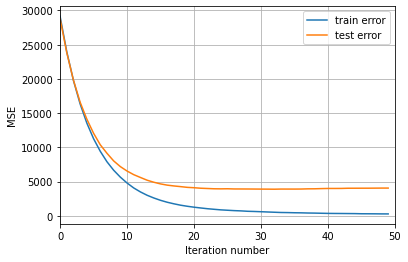

In [15]:
get_error_plot(n_trees, train_errors_5, test_errors_5)

In [16]:
%%time
n_trees = 50

max_depth = 7

eta = 0.1

trees, train_errors_7, test_errors_7 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

CPU times: user 47 s, sys: 1.07 s, total: 48.1 s
Wall time: 47.3 s


In [17]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 12.214196065775647
Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 4796.890586008792


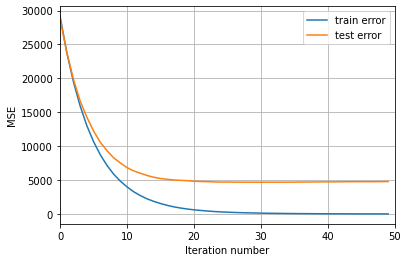

In [18]:
get_error_plot(n_trees, train_errors_7, test_errors_7)

***Построим для сравнения два графика: отдельно для данных на трейне и на тесте. Для большей наглядности ограничим масштаб графиков по оси y.*** 

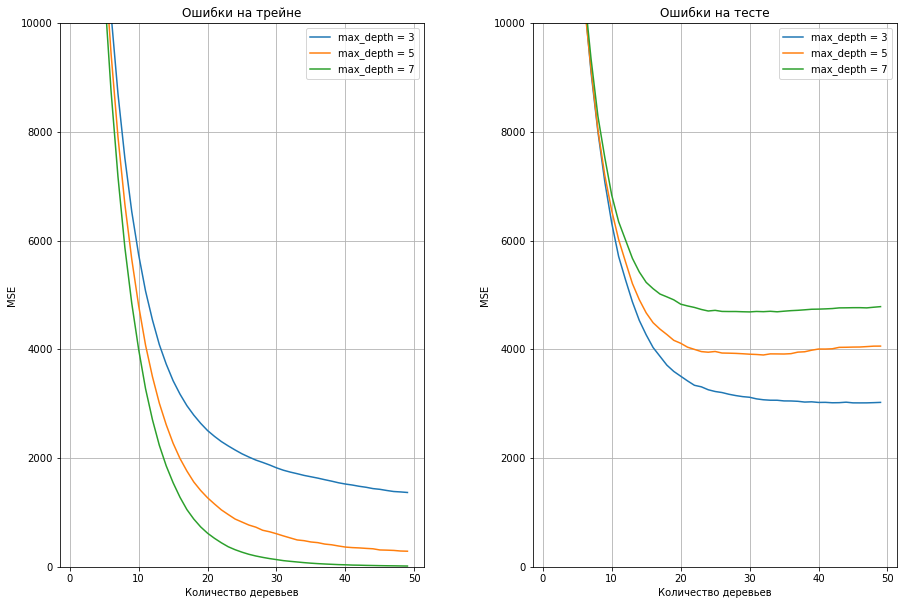

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = ax.flatten()
# plt.yscale(value="log")

fig.set_size_inches(15, 10)
fig.subplots_adjust(wspace=0.3)
y = 3000
f1 = y
ax1.plot(list(range(1, n_trees)), train_errors_3[1:], label='max_depth = 3')
ax1.plot(list(range(1, n_trees)), train_errors_5[1:], label="max_depth = 5")
ax1.plot(list(range(1, n_trees)), train_errors_7[1:], label="max_depth = 7")
ax1.set_ylim([0, 10000])
ax1.set_title("Ошибки на трейне")
ax1.set_xlabel("Количество деревьев")
ax1.set_ylabel("MSE")
ax1.grid()
ax1.legend(loc="upper right")

ax2.plot(list(range(1, n_trees)), test_errors_3[1:], label="max_depth = 3")
ax2.plot(list(range(1, n_trees)), test_errors_5[1:], label="max_depth = 5")
ax2.plot(list(range(1, n_trees)), test_errors_7[1:], label="max_depth = 7")
ax2.set_ylim([0, 10000])
ax2.set_title("Ошибки на тесте")
ax2.set_xlabel("Количество деревьев")
ax2.set_ylabel("MSE")
ax2.grid()
ax2.legend(loc="upper right")

   **С увеличением количества деревьев сначала ошибка снижается на трейне и на тесте. При дальнейшем увеличении количества деревьев ошибка на тесте перестает снижаться и даже начинает увеличиваться, при этом ошибка на трейне продолжает становиться все меньше и стремится к 0. Это показывает, что с этого момента модель стала переобучаться.
   Достаточно сильное влияние на этот процесс оказывает параматр максимальной глубины дерева. Чем больше глубина - тем быстрее наступает переобучение. При одинаковых условиях лучший результат на тесте показала модель с меньшей глубиной.
   Вывод: модели градиентного бустинга способны переобучаться. Чтобы этого не происходило необходимо внимательно подбирать параметры максимальной глубины и количества деревьев в ансамбле. Это напрямую влияет на скорость обучения и на качество предсказания модели**